In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns # Seaborn is a useful library for Data Visualisation
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('F:/uit/AI/Finallllll/onlinefraud.csv')
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:

d = {'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4}
df['type'] = df['type'].map(d)
df = df.drop(columns=['nameOrig']) #name
df = df.drop(columns=['nameDest']) #name
#oldbalanceOrg: Số tiền trong tài khoảng của A trước khi giao dịch
#newbalanceOrig: Số tiền trong tài khoảng của A sau khi giao dịch
#oldbalanceDest:Số tiền trong tài khoảng của B trước khi giao dịch
#newbalanceDest:Số tiền trong tài khoảng của B sau khi giao dịch
df.dtypes


step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df.describe(include='all')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.055307e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,9.808966e-01,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,0.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
new_df = df.copy()
new_df['amount'] = RobustScaler().fit_transform(new_df['amount'].to_numpy().reshape(-1, 1))
new_df['oldbalanceOrg'] = RobustScaler().fit_transform(new_df['oldbalanceOrg'].to_numpy().reshape(-1, 1))
new_df['newbalanceOrig'] = RobustScaler().fit_transform(new_df['newbalanceOrig'].to_numpy().reshape(-1, 1))
new_df['oldbalanceDest'] = RobustScaler().fit_transform(new_df['oldbalanceDest'].to_numpy().reshape(-1, 1))
new_df['newbalanceDest'] = RobustScaler().fit_transform(new_df['newbalanceDest'].to_numpy().reshape(-1, 1))


new_df.describe(include='all')


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.055307e+00,5.374952e-01,7.638017e+00,5.927652e+00,1.026467e+00,9.086488e-01,1.290820e-03,2.514687e-06
std,1.423320e+02,9.808966e-01,3.091447e+00,2.691365e+01,2.026952e+01,3.604505e+00,3.304342e+00,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,-3.833062e-01,-1.323951e-01,0.000000e+00,-1.407216e-01,-1.930566e-01,0.000000e+00,0.000000e+00
25%,1.560000e+02,0.000000e+00,-3.147585e-01,-1.323951e-01,0.000000e+00,-1.407216e-01,-1.930566e-01,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.543090e-17,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.000000e+00,6.852415e-01,8.676049e-01,1.000000e+00,8.592784e-01,8.069434e-01,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,4.728907e+02,5.551017e+02,3.437237e+02,3.773800e+02,3.201382e+02,1.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>],
       [<Axes: title={'center': 'newbalanceDest'}>,
        <Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>]], dtype=object)

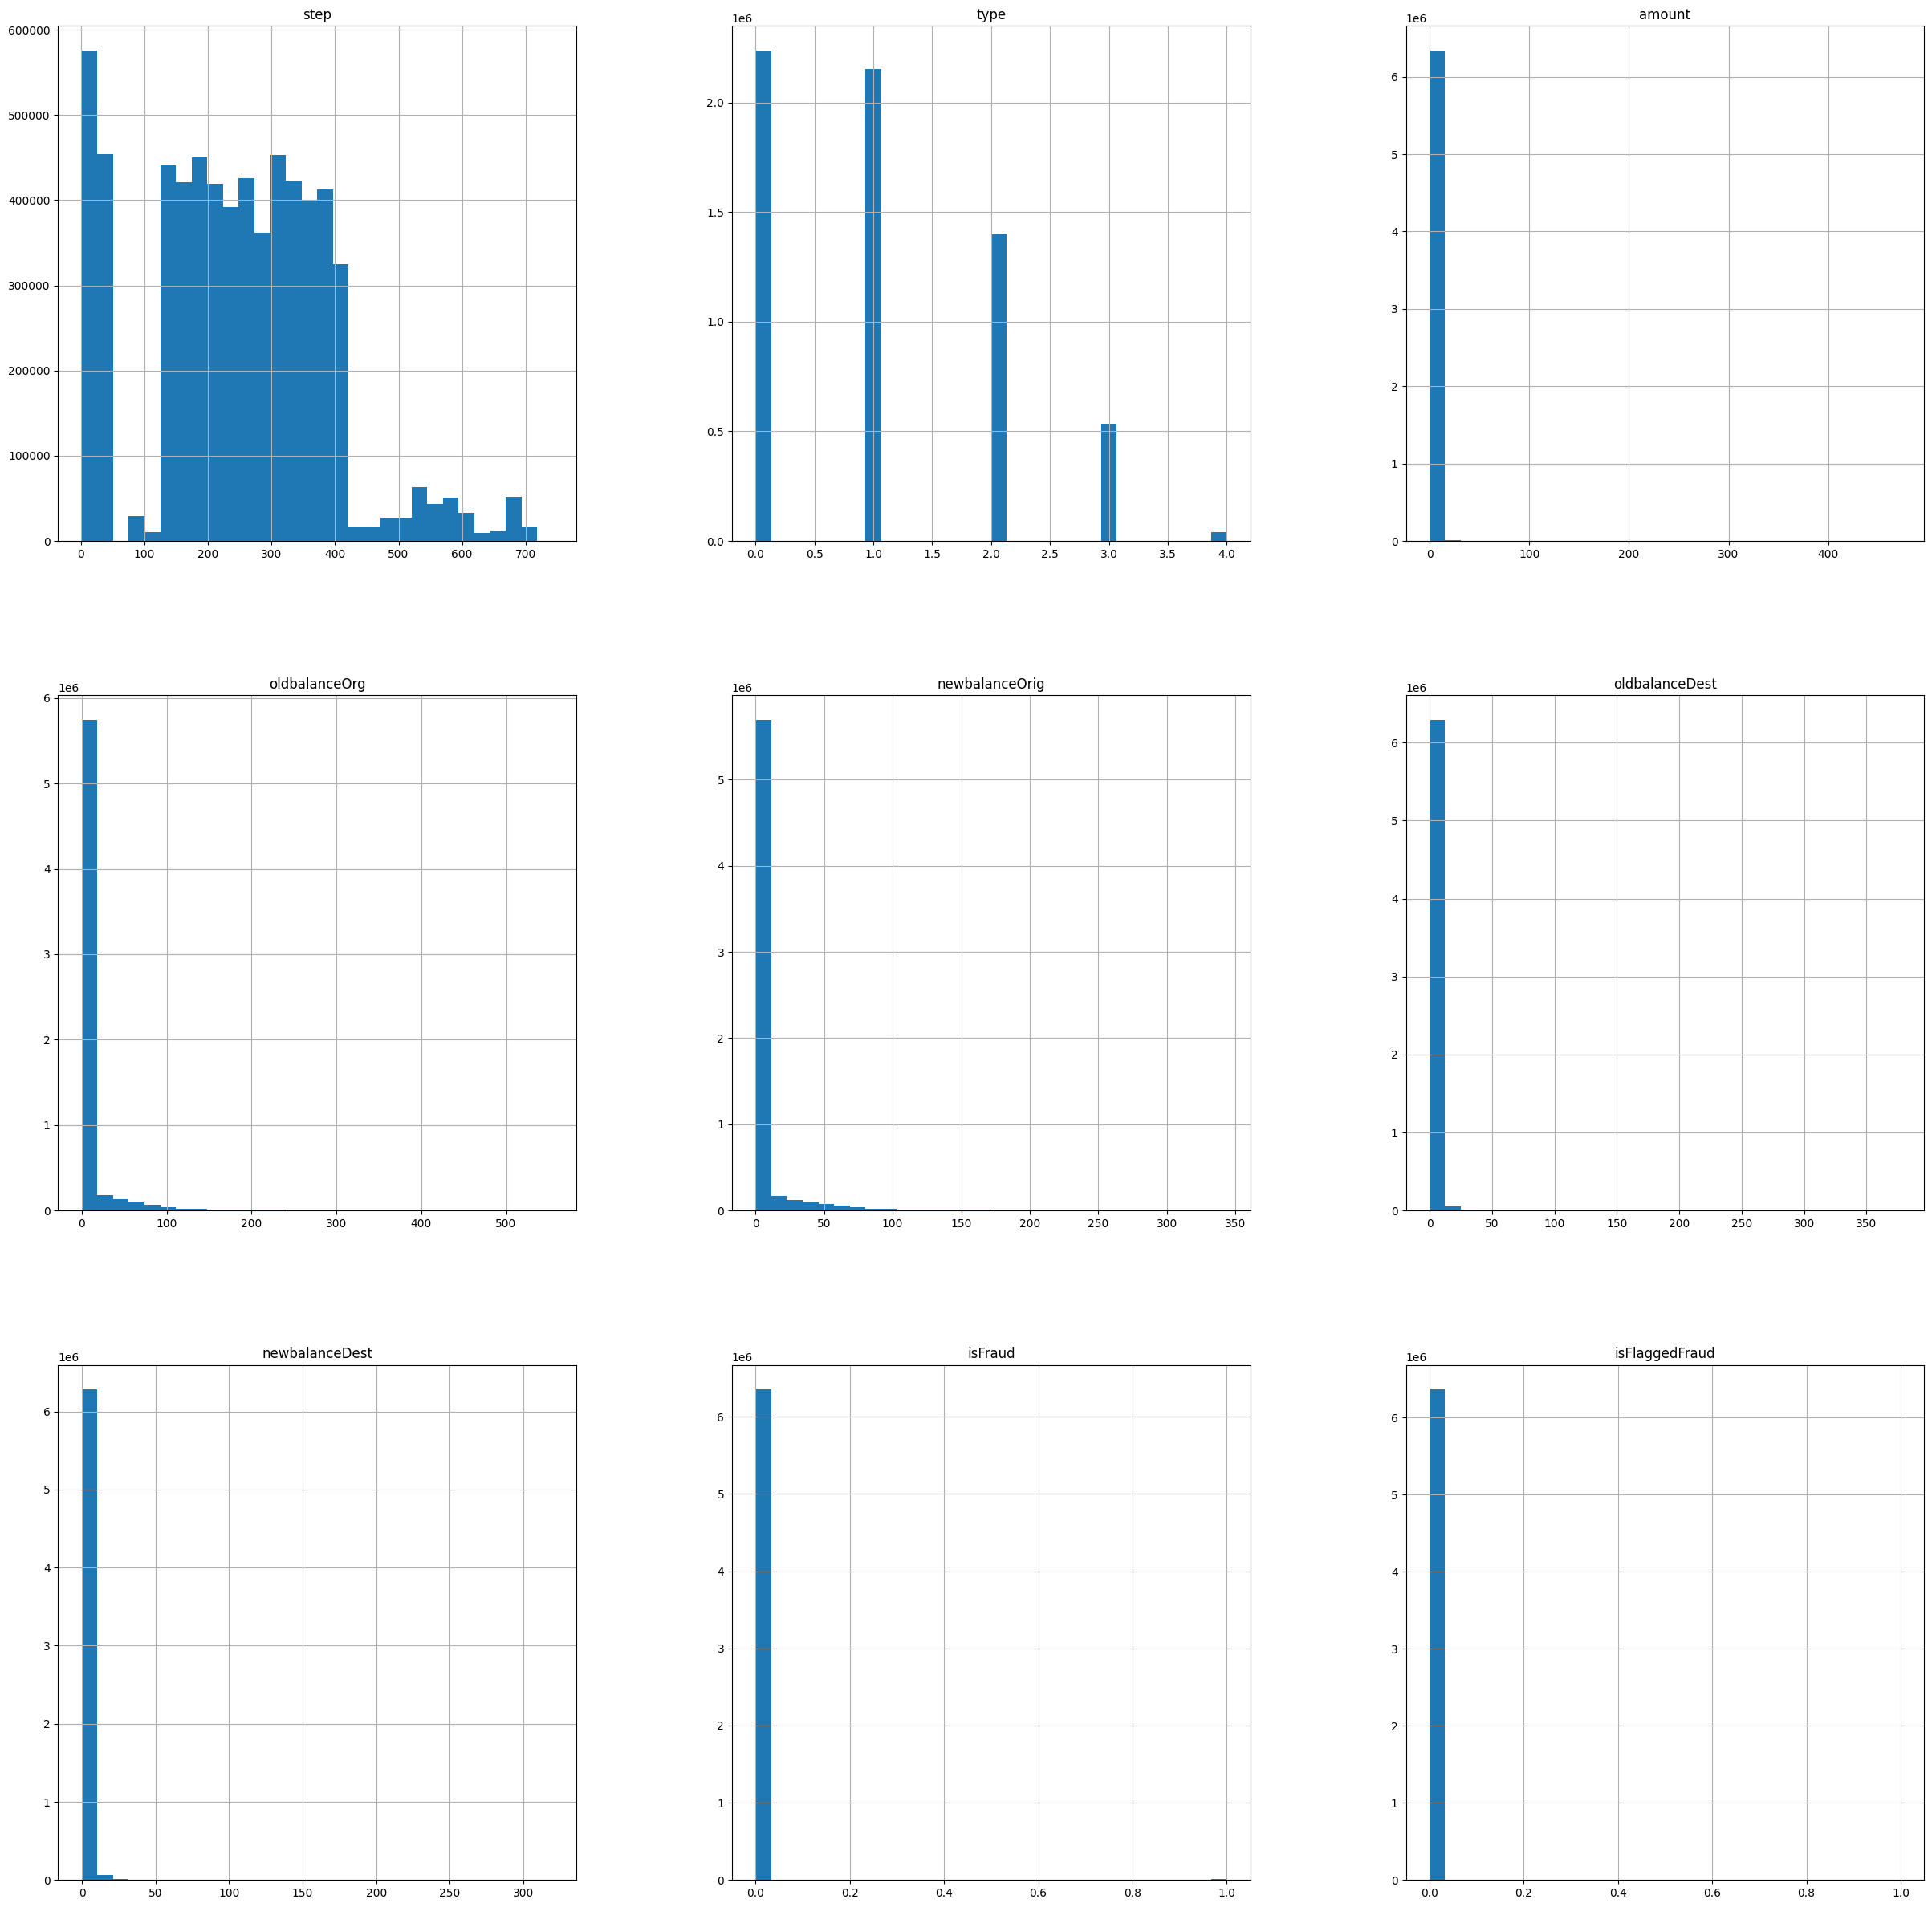

In [7]:
new_df
new_df.hist(bins=30, figsize=(30, 30))

In [8]:
missing_data = new_df.isnull().sum()
print(missing_data)


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


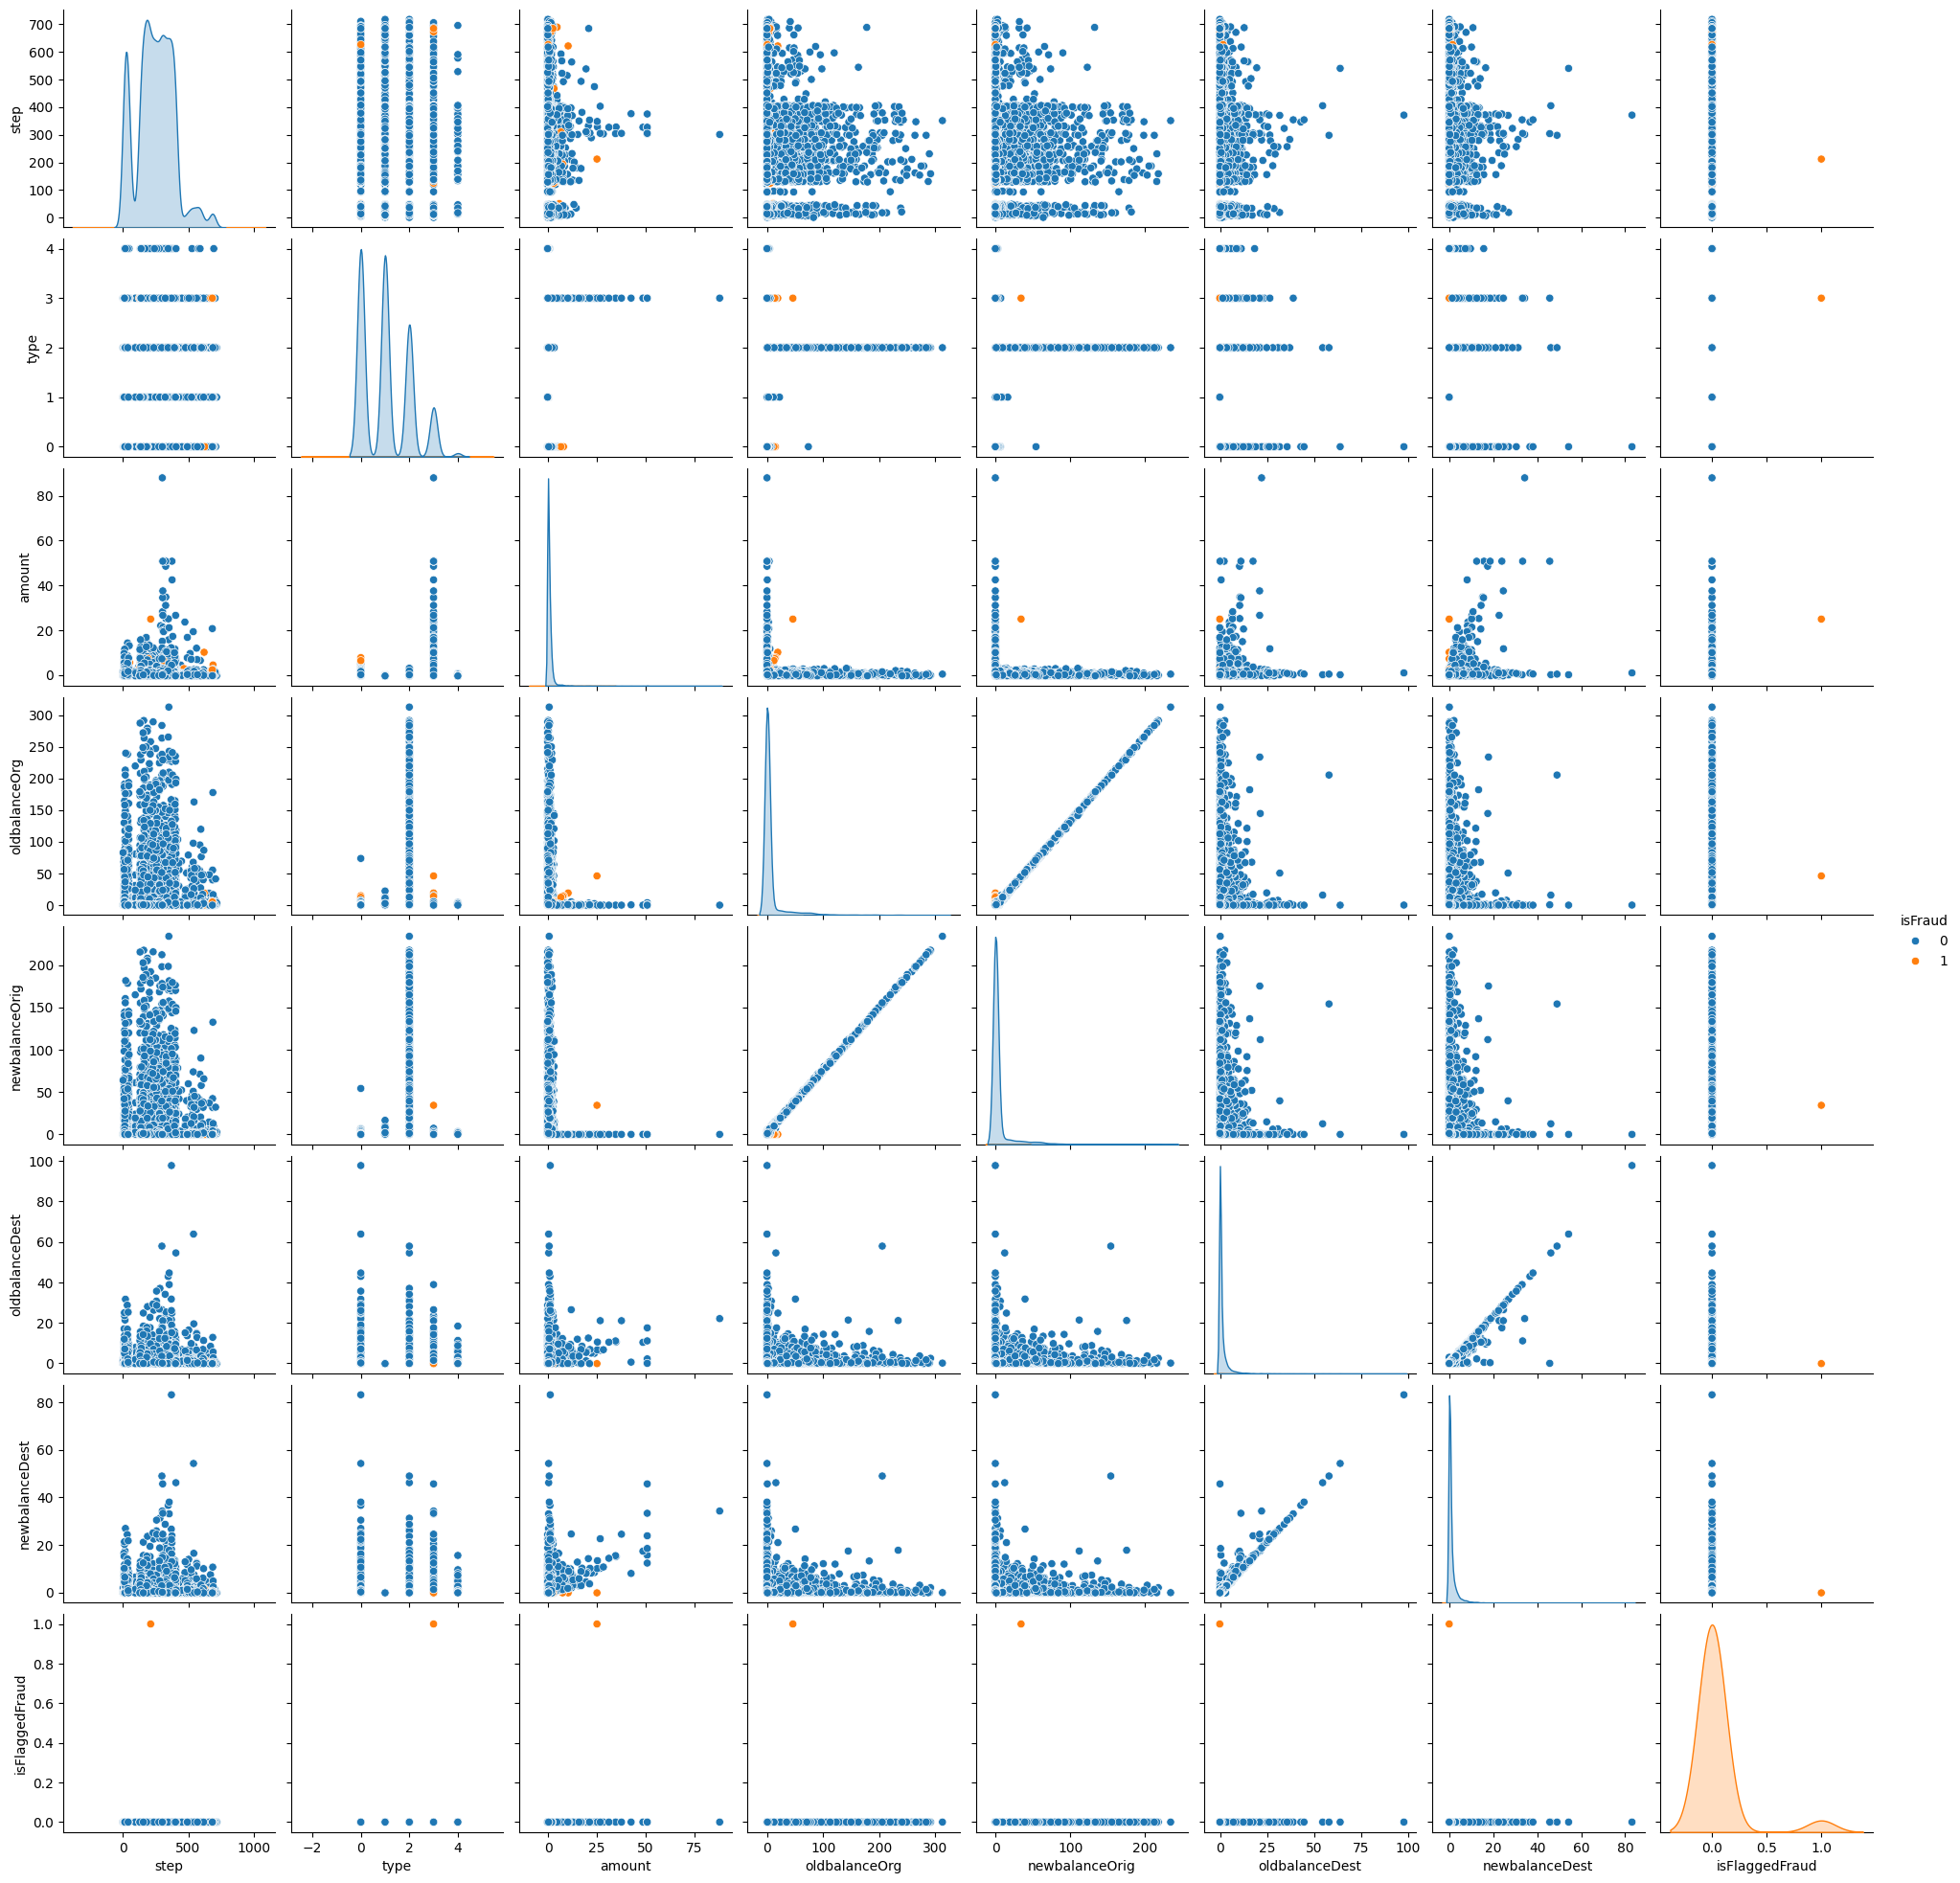

In [9]:
sampled_df = new_df.sample(n=10000, random_state=42)
sns.pairplot(sampled_df, hue='isFraud')

<Axes: xlabel='step', ylabel='count'>

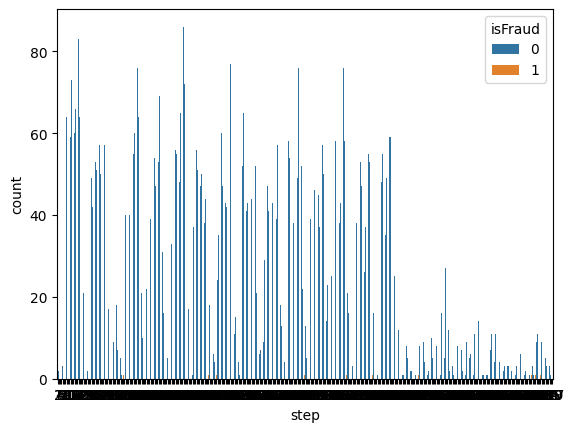

In [18]:
sns.countplot(data  = sampled_df, x = 'step', hue="isFraud")

<Axes: xlabel='type', ylabel='count'>

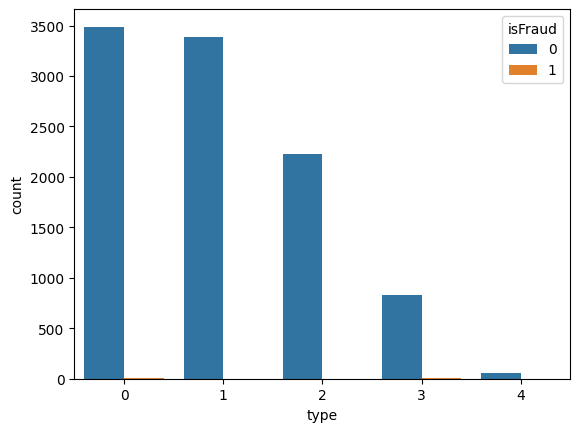

In [16]:
sns.countplot(data  = sampled_df, x = 'type', hue="isFraud")

In [ ]:
sns.countplot(data  = sampled_df, x = 'isFlaggedFraud', hue="isFraud")

In [10]:
# slit and train
X= new_df.drop(columns='isFraud')
y= new_df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Accuracy: 0.9996526588103642
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.75      0.85      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



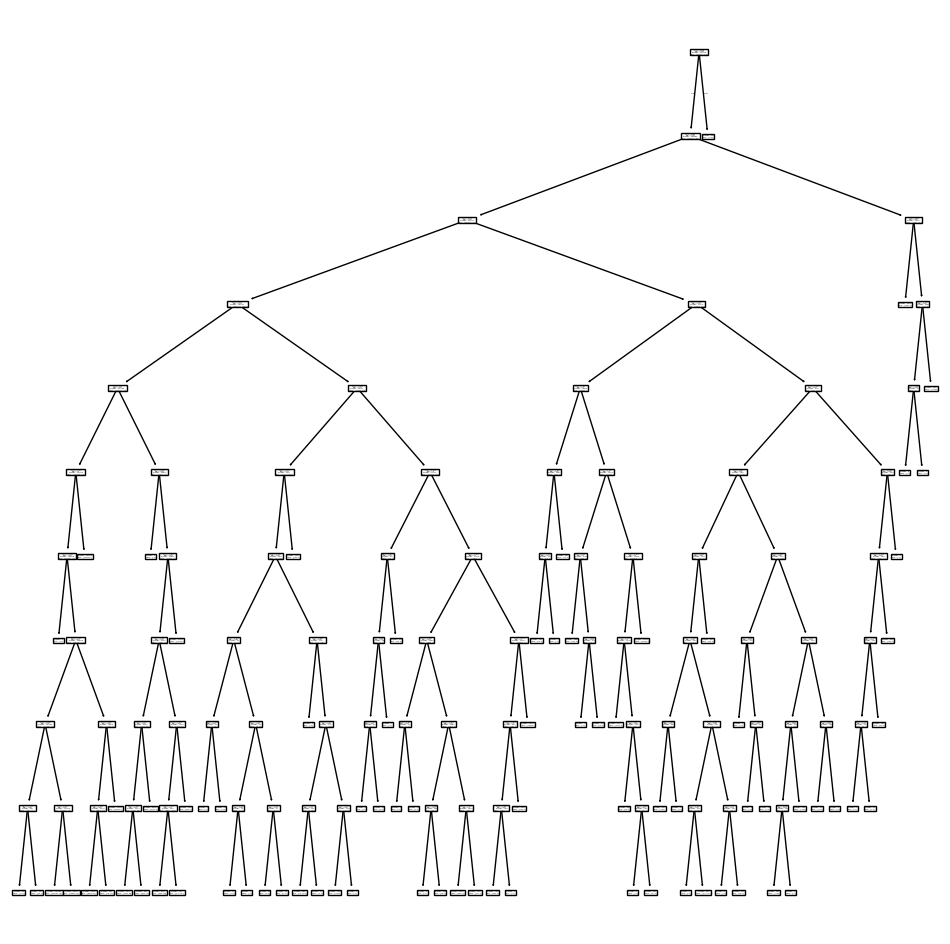

In [11]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)


clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf)
plt.show()

#precision: biết True bắt True
#recall: biết False bắt False